<a href="https://colab.research.google.com/github/GabrielaCuervoR/Analitica3/blob/main/exploraci%C3%B3n_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import matplotlib.pyplot as plt
import pandas as pd ### para manejo de datos
import sqlite3 as sql #Para manejar sql
from pandas.plotting import scatter_matrix  ## para matriz de correlaciones

In [5]:
%run a_funciones.ipynb

In [6]:
##Se cargan las bases de datos almacenadas en el github
df_data= 'https://raw.githubusercontent.com/GabrielaCuervoR/Analitica3/main/Data/general_data.csv'
df_retiros= 'https://raw.githubusercontent.com/GabrielaCuervoR/Analitica3/main/Data/retirement_info.csv'
df_employee= 'https://raw.githubusercontent.com/GabrielaCuervoR/Analitica3/main/Data/employee_survey_data.csv'
df_manager= 'https://raw.githubusercontent.com/GabrielaCuervoR/Analitica3/main/Data/manager_survey_data.csv'

In [7]:
##Se leen la base de datos con la información arreglada
df_data=pd.read_csv(df_data, sep= ';' )
df_retiros=pd.read_csv(df_retiros, sep=';')
df_employee=pd.read_csv(df_employee)
df_manager=pd.read_csv(df_manager)

In [8]:
conn= sql.connect("db_empleados") ## Con este comando se crea la base de datos o si ya existe se conecta

df_employee.to_sql("employee_survey_data",conn,if_exists="replace")
df_data.to_sql("general_data",conn,if_exists="replace")
df_manager.to_sql("manager_survey_data",conn,if_exists="replace")
df_retiros.to_sql("retirement_info",conn,if_exists="replace")

711

In [10]:
cur= conn.cursor()
ejecutar_sql('preprocesamiento.sql', cur)

In [11]:
df2=pd.read_sql("select * from base_nueva", conn)

In [12]:
df2 = df2.drop(columns=['index'], axis=1)##Se elimina la columna index que por defecto la sube sql

<AxesSubplot:ylabel='Over18'>

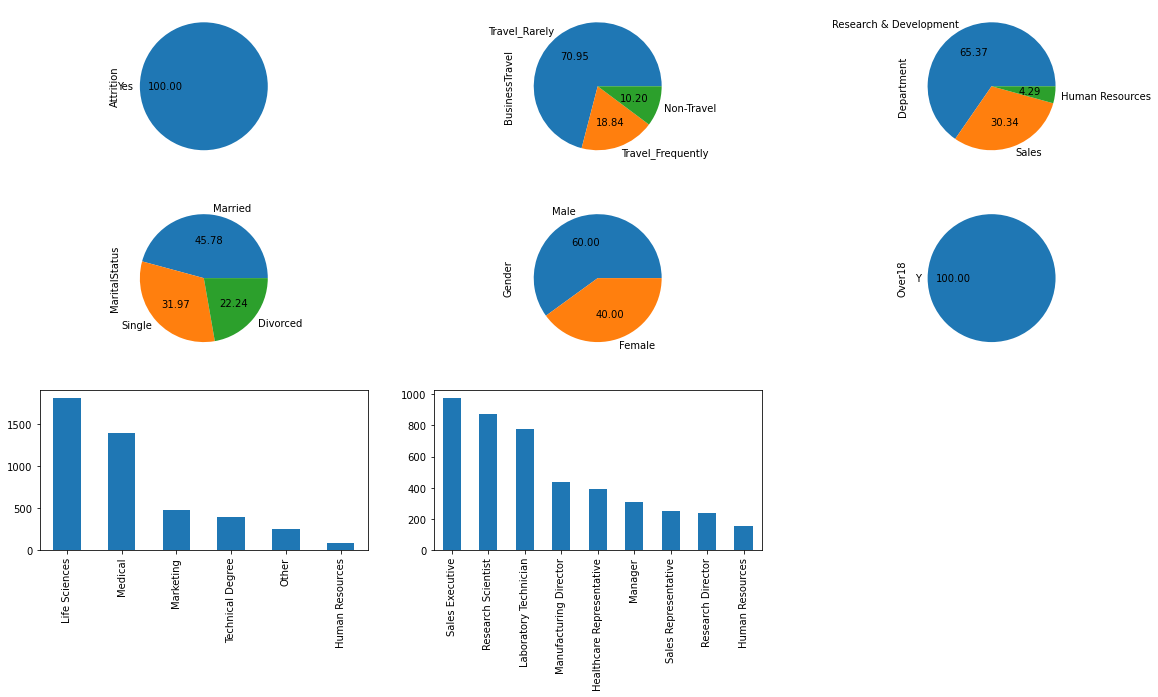

In [14]:
##Gráficos variables categóricas
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
df2['Attrition'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,2)
df2['BusinessTravel'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,3)
df2['Department'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,7)
df2['EducationField'].value_counts().plot(kind='bar')
plt.subplot(3,3,5)
df2['Gender'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,8)
df2['JobRole'].value_counts().plot(kind='bar')
plt.subplot(3,3,4)
df2['MaritalStatus'].value_counts().plot(kind='pie',autopct='%.2f')
plt.subplot(3,3,6)
df2['Over18'].value_counts().plot(kind='pie',autopct='%.2f')


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeID'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StandardHours'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:

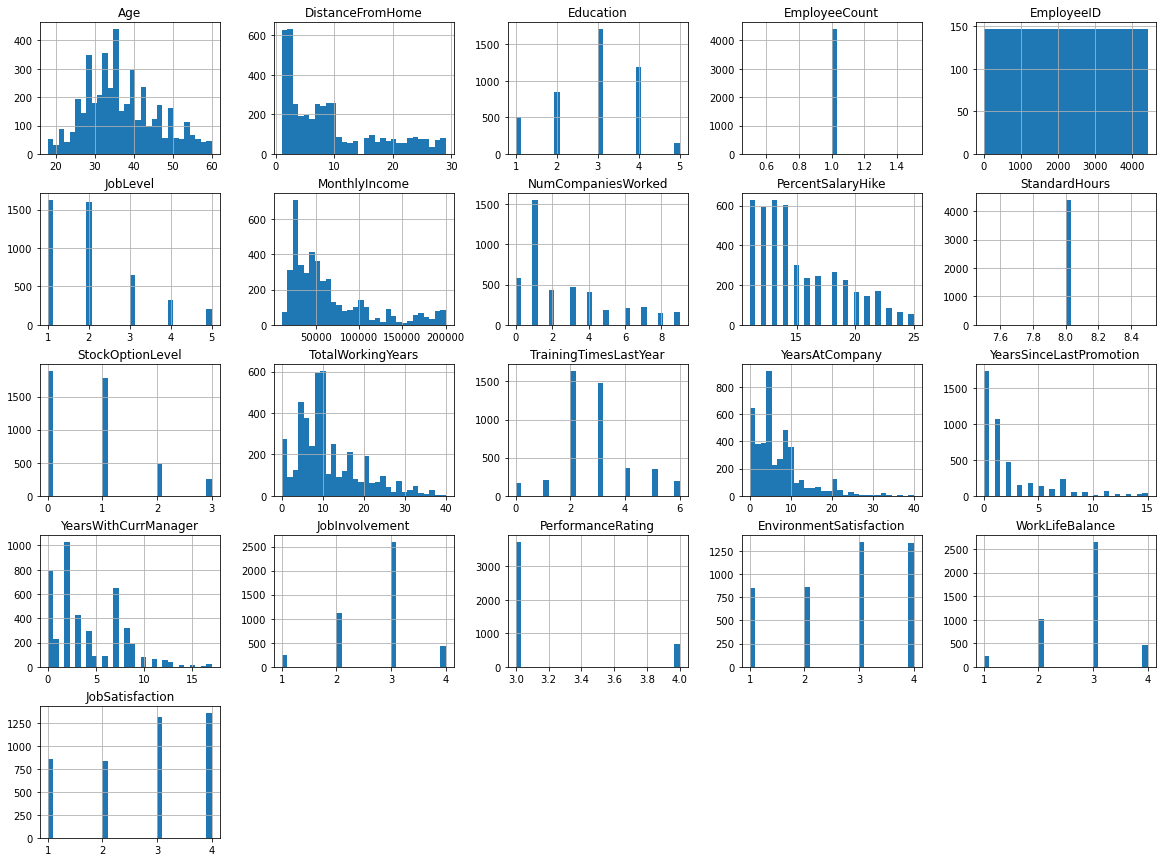

In [15]:
##Gráficos de las variables numéricas
df2.hist(bins=30, figsize=(20, 15))

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   BusinessTravel           4410 non-null   object 
 2   Department               4410 non-null   object 
 3   DistanceFromHome         4410 non-null   int64  
 4   Education                4410 non-null   int64  
 5   EducationField           4410 non-null   object 
 6   EmployeeCount            4410 non-null   int64  
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [17]:
df2.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,WorkLifeBalance,JobSatisfaction
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4372.000000,4390.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741,2.723603,2.761436,2.728246
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742,1.092756,0.706245,1.101253
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000,4.000000,3.000000,4.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [18]:
df2['Attrition'] = df2['Attrition'].fillna('No') #se rellenan los nulos de la variable objetivo por No

<AxesSubplot:>

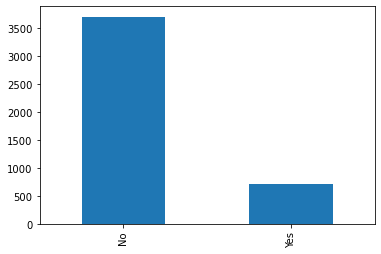

In [19]:
#Histograma de la variable objetivo
df2['Attrition'].value_counts().plot(kind='bar')

In [20]:
# LabelEncoder: Transformar la variable objetivo en numérica para posteriormente hacer la correlación
y = df2.Attrition ##Variable Objetivo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y[0:5])

print(le.classes_)

[0 1 0 0 0]
['No' 'Yes']


In [21]:
df2['Attrition'] = y

In [22]:
#Correlación de la variable ojetivo con las numéricas
corr = df2.corr()
corr[['Attrition']].sort_values(by = 'Attrition',ascending = False)\
.style.background_gradient()

,Attrition
Attrition,1.000000
NumCompaniesWorked,0.042345
PercentSalaryHike,0.032533
PerformanceRating,0.023403
EmployeeID,-0.004729
StockOptionLevel,-0.006839
DistanceFromHome,-0.009730
JobLevel,-0.010290
Education,-0.015111
JobInvolvement,-0.015588


Las variables que presentan mayor correlación negativa con la variable objetivo son TotalWorkingYears que son el número de años que el empleado ha trabajado hasta ahora, Age que es la edad del empleado y YearsWithCurrManager que son el número de años con el jefe actual.